<a href="https://colab.research.google.com/github/eldercamposds/DoencaCardiaca/blob/Pre_Processamento/DoencaCardiacaClassificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aprendizagem Supervisionada: Classificação

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínicos e laboratoriais de referência.

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

#Pré Processamento

In [38]:
import numpy as np
import pandas as pd

In [39]:
df = pd.read_csv('/content/drive/MyDrive/Banco de dados/heart_tratato.csv', sep=',', encoding='iso-8859-1')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [40]:
df.shape

(917, 12)

#Transformando variáveis categóricas nominais em categóricas ordinais

In [41]:
df2 = pd.DataFrame.copy(df)

In [42]:
df2.Sex.replace({'M':0,'F':1}, inplace=True)
df2.ChestPainType.replace({'ATA':1,'NAP':2,'ASY':3,'TA':0}, inplace=True)
df2.RestingECG.replace({'Normal':0,'ST':1,'LVH':2}, inplace=True)
df2.ExerciseAngina.replace({'N':0,'Y':1}, inplace=True)
df2.ST_Slope.replace({'Up':0,'Flat':1,'Down':2}, inplace=True)

In [43]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289.0,0,0,172,0,0.0,0,0
1,49,1,2,160,180.0,0,0,156,0,1.0,1,1
2,37,0,1,130,283.0,0,1,98,0,0.0,0,0
3,48,1,3,138,214.0,0,0,108,1,1.5,1,1
4,54,0,2,150,195.0,0,0,122,0,0.0,0,0


In [44]:
df2.dtypes

,0
Age,int64
Sex,int64
ChestPainType,int64
RestingBP,int64
Cholesterol,float64
FastingBS,int64
RestingECG,int64
MaxHR,int64
ExerciseAngina,int64
Oldpeak,float64


**Legenda**

* Age = idade (anos)

* Sex = sexo
      (0=M; 1=F)

* Chest Pain Type = tipo de dor no peito
      (0=TA:angina típica; 1=ATA:angina atípica; 2=NAP:dor não anginosa; 3=ASY:assintomático)

* Resting BP = pressão sanguínea em repouso (mmHg)

* Cholesterol = colesterol sérico (mg/dl)

* Fasting BS = açúcar no sangue em jejum (mg/dl)
          0: Fasting BS < 120 mg/dl (não diabético)
          1: Fasting BS >= 120 mg/dl, (diabético)

* Resting ECG = eletrocardiograma em repouso
      (0=Normal; 1=ST:Anormalidade da onda ST-T; 2=LVH: Hipertrofia ventricular esquerda)

* Max HR = frequência cardíaca máxima

* Exercise Angina = Angina induzida por exercício      
      (0=Não; 1=Sim)

* Old Peak = Depressão de ST induzida por exercício em relação ao repouso

* ST_Slope = Inclinação do segmento ST
      (0=UP; 1=Flat; 2=Down)

* Heart Disease = Doença cardíaca
      (0=Não possui doença cardíaca; 1=Possui doença cardíaca)


#Atributos Previsores e Alvo


In [45]:
df.shape[1]

12

In [46]:
previsores = df2.iloc[:,0:11].values
previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [47]:
previsores.shape

(917, 11)

In [48]:
alvo = df2.iloc[:,11].values

In [49]:
alvo.shape

(917,)

In [50]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

#OneHotEncoder: Criação de variáveis Dummy(ficitícia)


OneHotEncoder trata de problemas de multicolinearidade (variáveis altamente correlacionadas)

> obs.: OneHotEncoder aumenta o número de colunas

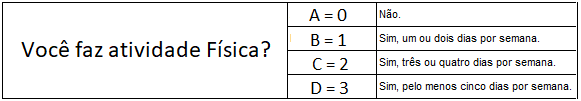

A   B   C   D   
1   0   0   0   
0   1   0   0   
0   0   1   0   
0   0   0   1


In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Parâmetros ColumnTransformer
- name: nome dado a transformação.
- transformer: tipo de estimador (OneHotEncoder).
- columns: colunas que serão transformadas.
- remainder: o que acontecerá com o restante das colunas não relacionadas:
      1) drop = exclui as outras colunas.
      2) passthrough = mantém as outras colunas. drop é default.  
- sparse_threshold: parâmetro de classificação de matrizes esparsas. default é 0.3
- n_jobs: número de trabalhos a serem executados em paralelo. default é nenhum
- transformer_weights: definição de pesos aos transformadores.
-verbose: default é False. se for True a execução é apresentada na tela.

In [52]:
#selecionado apenas as colunas que foram trasnformadas em ordinais
previsores3 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])],
                                remainder='passthrough').fit_transform(previsores)

In [58]:
previsores3

array([[  1. ,   0. ,   0. , ...,   0. , 172. ,   0. ],
       [  0. ,   1. ,   0. , ...,   0. , 156. ,   1. ],
       [  1. ,   0. ,   0. , ...,   0. ,  98. ,   0. ],
       ...,
       [  1. ,   0. ,   0. , ...,   0. , 115. ,   1.2],
       [  0. ,   1. ,   0. , ...,   0. , 174. ,   0. ],
       [  1. ,   0. ,   0. , ...,   0. , 173. ,   0. ]])

In [59]:
visao = pd.DataFrame(previsores3)
visao.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,40.0,140.0,289.0,0.0,172.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,37.0,130.0,283.0,0.0,98.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,54.0,150.0,195.0,0.0,122.0,0.0


#Análise das escalas dos atributos (Escalonamento)

**Opções para escalonamento**

* Padronização(utiliza a média e o desvio padrão como referência)
* Normalização(utiliza os valores máximo e mínimo como referência)

In [54]:
#utilizando padronização
from sklearn.preprocessing import StandardScaler


In [60]:
previsores_esc = StandardScaler().fit_transform(previsores3)
previsores_esc

array([[ 0.51630861, -0.51630861, -0.22981048, ..., -0.55173333,
         1.38333943, -0.83150225],
       [-1.9368261 ,  1.9368261 , -0.22981048, ..., -0.55173333,
         0.75473573,  0.10625149],
       [ 0.51630861, -0.51630861, -0.22981048, ..., -0.55173333,
        -1.52395266, -0.83150225],
       ...,
       [ 0.51630861, -0.51630861, -0.22981048, ..., -0.55173333,
        -0.85606123,  0.29380223],
       [-1.9368261 ,  1.9368261 , -0.22981048, ..., -0.55173333,
         1.46191489, -0.83150225],
       [ 0.51630861, -0.51630861, -0.22981048, ..., -0.55173333,
         1.42262716, -0.83150225]])

In [61]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.516309,-0.516309,-0.22981,2.073784,-0.531524,-1.085425,0.815013,-0.490781,-0.507826,0.824310,-0.824310,1.149573,-1.001091,-0.271607,-1.432206,0.414627,0.832075,-0.551733,1.383339,-0.831502
1,-1.936826,1.936826,-0.22981,-0.482210,1.881384,-1.085425,0.815013,-0.490781,-0.507826,0.824310,-0.824310,-0.869888,0.998910,-0.271607,-0.478057,1.526360,-1.212261,-0.551733,0.754736,0.106251
2,0.516309,-0.516309,-0.22981,2.073784,-0.531524,-1.085425,-1.226974,2.037569,-0.507826,0.824310,-0.824310,1.149573,-1.001091,-0.271607,-1.750256,-0.141240,0.719543,-0.551733,-1.523953,-0.831502
3,-1.936826,1.936826,-0.22981,-0.482210,-0.531524,0.921298,0.815013,-0.490781,-0.507826,-1.213136,1.213136,-0.869888,0.998910,-0.271607,-0.584074,0.303453,-0.574578,-0.551733,-1.131075,0.575128
4,0.516309,-0.516309,-0.22981,-0.482210,1.881384,-1.085425,0.815013,-0.490781,-0.507826,0.824310,-0.824310,1.149573,-1.001091,-0.271607,0.052026,0.970493,-0.930931,-0.551733,-0.581047,-0.831502


In [62]:
previsoresdf.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,-1.472226e-16,1.084798e-16,6.973702e-17,-3.874279e-17,3.874279e-17,1.937139e-17,-9.298269e-17,1.549712e-17,0.000000,-4.261707e-17,4.261707e-17,-3.874279e-17,0.000000,8.523413e-17,1.859654e-16,7.884157e-16,3.014189e-15,-1.549712e-17,-5.114048e-16,-1.859654e-16
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-1.936826e+00,-5.163086e-01,-2.298105e-01,-4.822104e-01,-5.315237e-01,-1.085425e+00,-1.226974e+00,-4.907810e-01,-0.507826,-1.213136e+00,-8.243101e-01,-8.698879e-01,-1.001091,-2.716072e-01,-2.704405e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-3.016886e+00,-3.269662e+00
25%,5.163086e-01,-5.163086e-01,-2.298105e-01,-4.822104e-01,-5.315237e-01,-1.085425e+00,-1.226974e+00,-4.907810e-01,-0.507826,-1.213136e+00,-8.243101e-01,-8.698879e-01,-1.001091,-2.716072e-01,-6.900904e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-6.596226e-01,-8.315022e-01
50%,5.163086e-01,-5.163086e-01,-2.298105e-01,-4.822104e-01,-5.315237e-01,9.212982e-01,8.150134e-01,-4.907810e-01,-0.507826,8.243101e-01,-8.243101e-01,-8.698879e-01,0.998910,-2.716072e-01,5.202558e-02,-1.412398e-01,3.198360e-15,-5.517333e-01,4.755658e-02,-2.688500e-01
75%,5.163086e-01,-5.163086e-01,-2.298105e-01,-4.822104e-01,-5.315237e-01,9.212982e-01,8.150134e-01,-4.907810e-01,-0.507826,8.243101e-01,1.213136e+00,1.149573e+00,0.998910,-2.716072e-01,6.881250e-01,4.146267e-01,4.194568e-01,-5.517333e-01,7.547357e-01,5.751284e-01
max,5.163086e-01,1.936826e+00,4.351412e+00,2.073784e+00,1.881384e+00,9.212982e-01,8.150134e-01,2.037569e+00,1.969177,8.243101e-01,1.213136e+00,1.149573e+00,0.998910,3.681787e+00,2.490407e+00,3.749826e+00,6.721265e+00,1.812470e+00,2.561971e+00,4.982571e+00
